# Analyzing some data on IPO first-day trends
## authors: JLM, RCT

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize':16,
         'axes.titlesize':16,
         'xtick.labelsize':16,
         'ytick.labelsize':16}
pylab.rcParams.update(params)

## Loading Data

In [3]:
cols = ['date','issuer','Symbol','Managers','offer_price','opening_price',
        'day1_close','day1_Px_change','change_opening','change_close','rating','performed']

years = [2018,2019,2020]
data_IPO = {}

for year in years:
    data_IPO[year] = pd.read_csv('IPO_data/data_{}.csv'.format(year),skiprows=3,header=None,names=cols)

#data_IPO[2018] = pd.read_csv('IPO_data/data_2018.csv',skiprows=3,header=None,names=cols)
#data_IPO[2019] = pd.read_csv('IPO_data/data_2019.csv',skiprows=3,header=None,names=cols)
#data_IPO[2020] = pd.read_csv('IPO_data/data_2020.csv',skiprows=3,header=None,names=cols)

## Defining a couple of functions to edit dataframes

In [4]:
def rm_symbol_and_change_str_to_float(df,column,symbol):
    df[column] = df[column].str.replace(symbol,'',regex=True).astype(float)
    
def m_d_y(st,which):
    m = st[:st.find('/')]
    st = st[st.find('/')+1:]
    d = st[:st.find('/')]
    y = st = st[st.find('/')+1:]
    if which=='m':
        return int(m)
    elif which=='d':
        return int(d)
    else:
        return int(y)
    
def process_df(df):
    rm_symbol_and_change_str_to_float(df,'offer_price','$')
    rm_symbol_and_change_str_to_float(df,'opening_price','$')
    rm_symbol_and_change_str_to_float(df,'day1_close','$')
    rm_symbol_and_change_str_to_float(df,'day1_Px_change','%')
    df['month'] = df['date'].map(lambda element: m_d_y(element,'m'))
    df['day'  ] = df['date'].map(lambda element: m_d_y(element,'d'))

## Editing dataframes

In [5]:
for year in years:
    process_df(data_IPO[year])
data_IPO[years[0]].head(2)

,date,issuer,Symbol,Managers,offer_price,opening_price,day1_close,day1_Px_change,change_opening,change_close,rating,performed,month,day
0,1/10/18,Nebula Acquisition,NEBUU,Deutsche Bank Securities/ Goldman Sachs,10.0,10.03,10.02,0.20,$0.03,$0.02,1,NaN,1,10
1,1/12/18,Industrial Logistics Properties Trust,ILPT,UBS Investment Bank/ Citigroup/ RBC Capital Ma...,24.0,23.70,23.35,-2.71,-$0.30,-$0.65,1,NaN,1,12


## Plotting correlation between offer, opening prices, and day 1 close

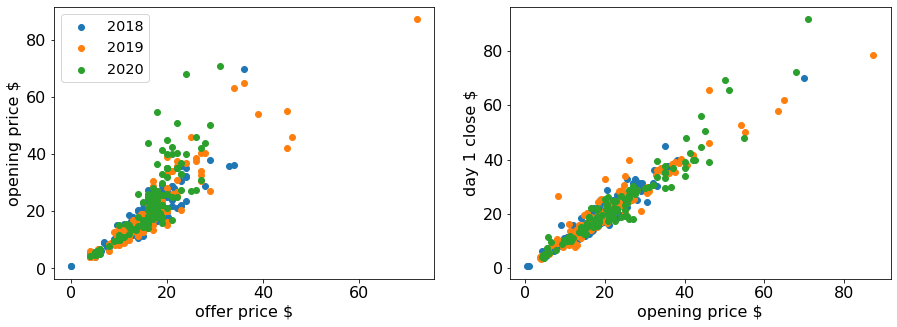

In [6]:
fig = plt.subplots(1,2,figsize=(15,5))

plt.subplot(1, 2, 1)

for year in years:
    plt.scatter(data_IPO[year]['offer_price'],data_IPO[year]['opening_price'],label='{}'.format(year))
plt.xlabel('offer price $')
plt.ylabel('opening price $')
plt.legend()

plt.subplot(1, 2, 2)
for year in years:
    plt.scatter(data_IPO[year]['opening_price'],data_IPO[year]['day1_close'])
plt.xlabel('opening price $')
plt.ylabel('day 1 close $')

plt.show()

## Plotting the day 1 percent change for different years

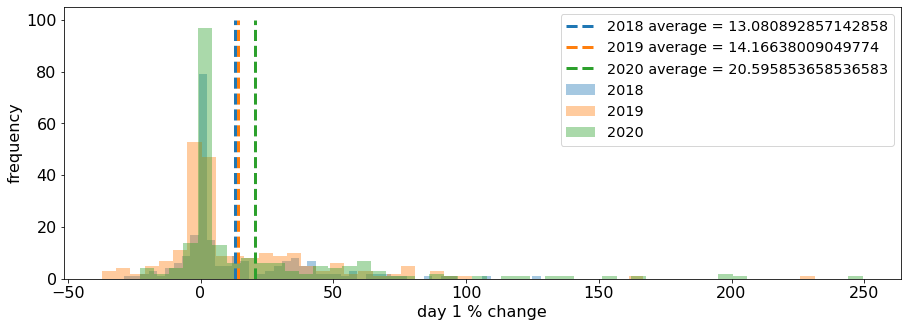

In [7]:
colors = ['tab:blue','tab:orange','tab:green']

for y,year in enumerate(years):
    plt.hist(data_IPO[year]['day1_Px_change'],alpha = 0.4,label='{}'.format(year),bins=50,color=colors[y])
    mean = data_IPO[year]['day1_Px_change'].mean()
    plt.plot([mean,mean],[0,100],color=colors[y],label='{} average = {}'.format(year,mean),ls='--',lw=3)

plt.xlabel('day 1 % change')
plt.ylabel('frequency')
plt.legend()

## Trying to find if there's a correlation between day 1 % change and month
(Need to include more years to try and see that)

Text(0.5, 0, 'month')

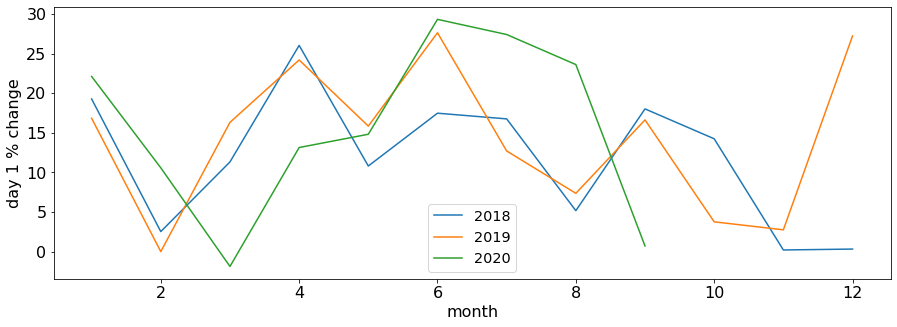

In [8]:
for year in years:
    x = []
    y = []
    for month in range(1,13):
        x.append(month)
        y.append(data_IPO[year]['day1_Px_change'][data_IPO[year]['month']==month].mean())
    plt.plot(x,y,label='{}'.format(year))
plt.legend()
plt.ylabel('day 1 % change')
plt.xlabel('month')

## Loading the data as excel to try to avoid changing cell types
[ ] Adding a calculated column for % day change at day 1

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
column_names = ['date','issuer','Symbol','Managers','offer_price','opening_price',
        'day1_close','day1_Px_change','change_opening','change_close','rating','performed']
df = pd.read_excel('data_2019.xlsx', skiprows=2, names=column_names)

In [35]:
df['day1_Px_change_from_opening'] = (df.day1_close - df.opening_price)/df.day1_close
df['day1_change_from_opening'] = df.day1_close - df.opening_price
df.head()

,date,issuer,Symbol,Managers,offer_price,opening_price,day1_close,day1_Px_change,change_opening,change_close,rating,performed,day1_Px_change_from_opening,day1_change_from_opening
0,2019-01-29,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.0,10.00,10.01,0.0010,0.00,0.01,1,NaN,0.000999,0.01
1,2019-01-30,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.0,20.00,20.20,0.0100,0.00,0.20,1,NaN,0.009901,0.20
2,2019-01-31,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.0,13.25,13.07,-0.0664,-0.75,-0.93,1,NaN,-0.013772,-0.18
3,2019-01-31,Pivotal Acquisition,PVT.U,Cantor,10.0,10.05,10.10,0.0100,0.05,0.10,1,NaN,0.004950,0.05
4,2019-02-01,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,10.0,10.14,10.12,0.0120,0.14,0.12,1,NaN,-0.001976,-0.02


,offer_price,opening_price,day1_close,day1_Px_change,change_opening,change_close,day1_Px_change_from_opening,day1_change_from_opening
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,14.723500,17.010227,17.353000,0.138274,2.286727,2.619955,0.003543,0.342773
std,7.693861,11.256616,11.406593,0.309088,4.955051,5.810494,0.126433,2.964904
min,4.000000,3.800000,3.550000,-0.372000,-4.880000,-6.330000,-0.592357,-8.950000
25%,10.000000,10.050000,10.030000,0.000000,0.000000,0.000000,-0.032127,-0.447500
50%,13.900000,13.500000,13.535000,0.011500,0.160000,0.115000,0.000000,0.000000
75%,17.000000,19.225000,20.122500,0.259400,3.000000,4.115000,0.042797,0.752500
max,72.000000,87.240000,78.290000,2.312500,29.300000,40.750000,0.684906,19.750000


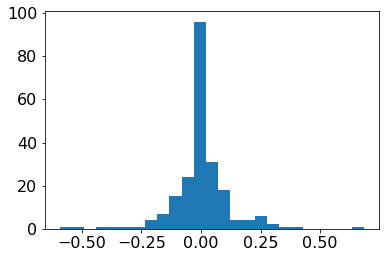

In [45]:
plt.hist(df['day1_Px_change_from_opening'], bins=25)
mean = df['day1_Px_change_from_opening'].mean()
df.describe()